In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_all = pd.read_csv("xz/all.csv", sep=';')
df_jiat = pd.read_csv("xz/jiat.csv", sep=';')
df_lasse = pd.read_csv("xz/lasse.csv", sep=';')
df_jiat_thanks_lasse = pd.read_csv("xz/jiat_thanks_lasse.csv", sep=';')
df_lasse_thanks_jiat = pd.read_csv("xz/lasse_thanks_jiat.csv", sep=';')

df_events  = pd.read_csv("events.csv", sep=';')
df_mailing  = pd.read_csv("xz/mailing.csv", sep=';')
df_sf  = pd.read_csv("xz/mailing.csv", sep=';')

df_interactions = pd.read_csv("xz/interactions.csv", sep=';')
df_interactions['Date'] = df_interactions['M']

dfs = [df_all, df_jiat, df_lasse, df_jiat_thanks_lasse, df_lasse_thanks_jiat, df_mailing, df_interactions, df_sf, df_events]

for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')


In [20]:
df_all

,Date,Commits,Added lines,Removed lines,Total changes
0,2007-12-01,20,42718,343,43061
1,2008-01-01,104,4617,1324,5941
2,2008-02-01,5,94,52,146
3,2008-03-01,15,263,214,477
4,2008-04-01,16,232,69,301
...,...,...,...,...,...
157,2024-02-01,153,23949,15654,39603
158,2024-03-01,26,2354,2107,4461
159,2024-04-01,100,1276,4176,5452
160,2024-05-01,78,14524,15125,29649


In [21]:
mdf_jiat = df_all.merge(df_jiat, how="inner", on='Date')
mdf_lasse = df_all.merge(df_lasse, how="inner", on='Date')

mdf_jiat_thanks_lasse = df_all.merge(df_jiat_thanks_lasse, how="inner", on='Date')
mdf_lasse_thanks_jiat = df_all.merge(df_lasse_thanks_jiat, how="inner", on='Date')


mdfs = [mdf_jiat, mdf_lasse, mdf_jiat_thanks_lasse, mdf_lasse_thanks_jiat]

In [22]:
mdf_lasse

,Date,Commits_x,Added lines_x,Removed lines_x,Total changes_x,Commits_y,Added lines_y,Removed lines_y,Total changes_y
0,2007-12-01,20,42718,343,43061,19,42717,341,43058
1,2008-01-01,104,4617,1324,5941,104,4617,1324,5941
2,2008-02-01,5,94,52,146,5,94,52,146
3,2008-03-01,15,263,214,477,15,263,214,477
4,2008-04-01,16,232,69,301,16,232,69,301
...,...,...,...,...,...,...,...,...,...
151,2024-02-01,153,23949,15654,39603,92,3974,2720,6694
152,2024-03-01,26,2354,2107,4461,12,151,45,196
153,2024-04-01,100,1276,4176,5452,80,1065,4128,5193
154,2024-05-01,78,14524,15125,29649,77,14518,15125,29643


In [23]:

mdfs = [mdf_jiat, mdf_lasse, mdf_jiat_thanks_lasse, mdf_lasse_thanks_jiat]

for mdf in mdfs:
    mdf['C %'] = mdf['Commits_y'] / mdf['Commits_x']
    mdf['T %'] = mdf['Total changes_y'] / mdf['Total changes_x']

In [24]:
mdf_lasse = mdf_lasse[mdf_lasse['Date'] > '2021-01-01']
mdf_lasse = mdf_lasse[mdf_lasse['Date'] < '2024-03-29']


df_all = df_all[df_all['Date'] > '2021-01-01']
df_all = df_all[df_all['Date'] < '2024-03-29']

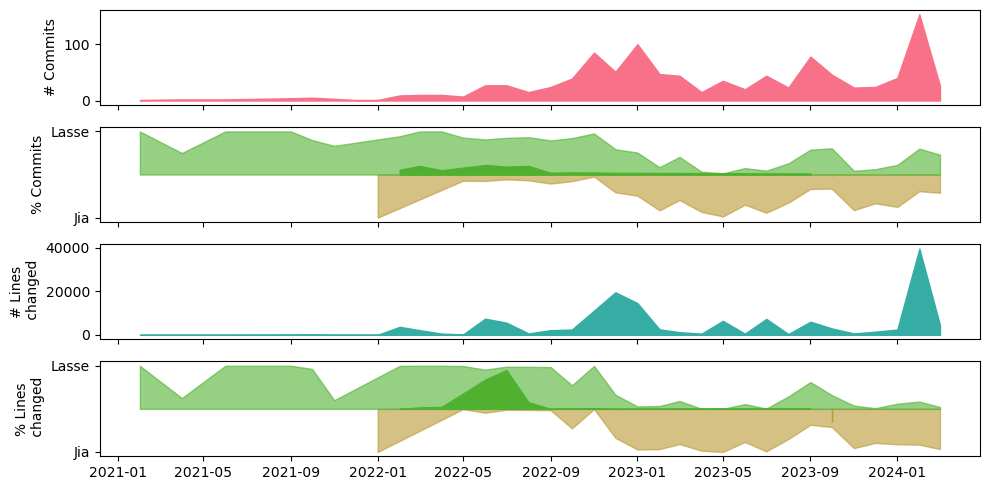

In [25]:
P = list(sns.husl_palette(6))

fig, axs = plt.subplots(4, figsize=(10, 5), sharex=True)
#sns.despine(fig)

# Plot 0

axs[0].fill_between(df_all['Date'], df_all['Commits'], color=P[0])
#axs[0].set_xticks([])
axs[0].set_ylabel('# Commits')

# Plot 1

axs[1].fill_between(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['C %'], color=P[1])
axs[1].fill_between(mdf_jiat['Date'], -1*mdf_jiat['C %'], alpha=0.6, color=P[1])

axs[1].fill_between(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['C %'], color=P[2])
axs[1].fill_between(mdf_lasse['Date'], mdf_lasse['C %'], alpha=0.6, color=P[2])
#axs[1].set_xticks([])
axs[1].set_yticks([1,-1],['Lasse', 'Jia'])
axs[1].set_ylabel('% Commits')

# Plot 2
axs[2].fill_between(df_all['Date'], df_all['Total changes'],color=P[3])
axs[2].set_ylabel('# Lines\n changed')

#axs[2].set_xticks([])


# Plot 3
axs[3].fill_between(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['T %'], color=P[1])
axs[3].fill_between(mdf_jiat['Date'], -1*mdf_jiat['T %'], alpha=0.6, color=P[1])

axs[3].fill_between(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['T %'],color=P[2])
axs[3].fill_between(mdf_lasse['Date'], mdf_lasse['T %'], alpha=0.6,color=P[2])
axs[3].set_yticks([1,-1],['Lasse', 'Jia'])
axs[3].set_ylabel('% Lines\n changed')
plt.tight_layout()

plt.savefig("changes_in_repository.pdf")

In [26]:
mdf_lasse

,Date,Commits_x,Added lines_x,Removed lines_x,Total changes_x,Commits_y,Added lines_y,Removed lines_y,Total changes_y,C %,T %
121,2021-02-01,1,9,2,11,1,9,2,11,1.000000,1.000000
122,2021-04-01,2,8,0,8,1,2,0,2,0.500000,0.250000
123,2021-06-01,2,3,3,6,2,3,3,6,1.000000,1.000000
124,2021-09-01,4,26,19,45,4,26,19,45,1.000000,1.000000
125,2021-10-01,5,102,8,110,4,95,7,102,0.800000,0.927273
126,2021-11-01,3,8,7,15,2,2,1,3,0.666667,0.200000
127,2022-02-01,9,3624,38,3662,8,3620,34,3654,0.888889,0.997815
128,2022-03-01,10,2093,53,2146,10,2093,53,2146,1.000000,1.000000
129,2022-04-01,10,438,137,575,10,438,137,575,1.000000,1.000000
130,2022-05-01,7,95,74,169,6,94,74,168,0.857143,0.994083


In [27]:
mdf_jiat

,Date,Commits_x,Added lines_x,Removed lines_x,Total changes_x,Commits_y,Added lines_y,Removed lines_y,Total changes_y,C %,T %
0,2022-01-01,1,6,0,6,1,6,0,6,1.000000,1.000000
1,2022-05-01,7,95,74,169,1,1,0,1,0.142857,0.005917
2,2022-06-01,27,7049,379,7428,4,656,8,664,0.148148,0.089391
3,2022-07-01,27,5456,128,5584,3,101,18,119,0.111111,0.021311
4,2022-08-01,15,582,59,641,2,10,6,16,0.133333,0.024961
5,2022-09-01,24,2063,58,2121,5,58,6,64,0.208333,0.030174
6,2022-10-01,39,2038,405,2443,6,861,245,1106,0.153846,0.452722
7,2022-11-01,85,7399,3736,11135,4,13,30,43,0.047059,0.003862
8,2022-12-01,51,14080,5452,19532,21,11604,1531,13135,0.411765,0.672486
9,2023-01-01,100,12864,1687,14551,49,12344,1379,13723,0.490000,0.943097


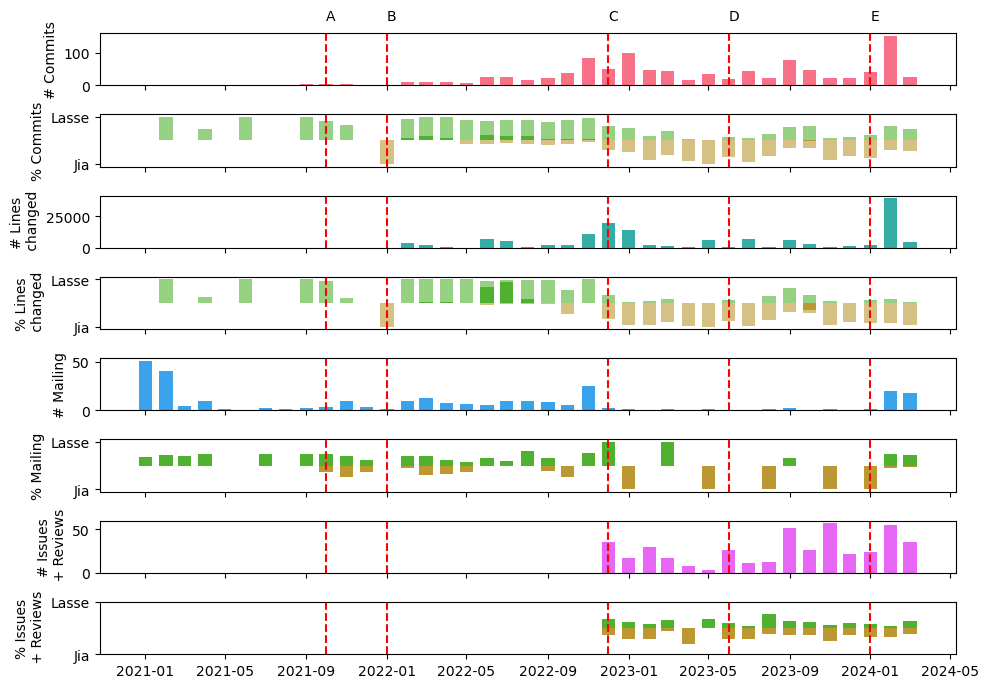

In [28]:
P = list(sns.husl_palette(6))
W = 20
fig, axs = plt.subplots(8, figsize=(10, 7), sharex=True)
#sns.despine(fig)

# Plot 0

axs[0].bar(df_all['Date'], df_all['Commits'], color=P[0], width=W)
#axs[0].set_xticks([])
axs[0].set_ylabel('# Commits')

# Plot 1

axs[1].bar(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['C %'], color=P[1], width=W)
axs[1].bar(mdf_jiat['Date'], -1*mdf_jiat['C %'], alpha=0.6, color=P[1], width=W)

axs[1].bar(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['C %'], color=P[2], width=W)
axs[1].bar(mdf_lasse['Date'], mdf_lasse['C %'], alpha=0.6, color=P[2],width=W)
#axs[1].set_xticks([])
axs[1].set_yticks([1,-1],['Lasse', 'Jia'])
axs[1].set_ylabel('% Commits')

# Plot 2
axs[2].bar(df_all['Date'], df_all['Total changes'],color=P[3], width=W)
axs[2].set_ylabel('# Lines\n changed')

#axs[2].set_xticks([])


# Plot 3
axs[3].bar(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['T %'], color=P[1], width=W)
axs[3].bar(mdf_jiat['Date'], -1*mdf_jiat['T %'], alpha=0.6, color=P[1],width=W)

axs[3].bar(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['T %'],color=P[2],width=W)
axs[3].bar(mdf_lasse['Date'], mdf_lasse['T %'], alpha=0.6,color=P[2],width=W)
axs[3].set_yticks([1,-1],['Lasse', 'Jia'])
axs[3].set_ylabel('% Lines\n changed')


# plot 4
axs[4].bar(df_mailing['Date'], df_mailing['all'], width=W, color=P[4])
axs[4].set_ylabel('# Mailing')

# plot 5
axs[5].bar(df_mailing['Date'], df_mailing['main%'], width=W, color=P[2])
axs[5].bar(df_mailing['Date'], -1 * df_mailing['attacker%'], width=W, color=P[1])
axs[5].set_yticks([1,-1],['Lasse', 'Jia'])

axs[5].set_ylabel('% Mailing')


# plot 6
axs[6].bar(df_interactions['Date'], df_interactions['all'], width=W, color=P[5])
axs[6].set_ylabel('# Issues\n + Reviews')

# plot 7
axs[7].bar(df_interactions['Date'], df_interactions['main%'], width=W, color=P[2])
axs[7].bar(df_interactions['Date'], -1 * df_interactions['attacker%'], width=W, color=P[1])
axs[7].set_yticks([1,-1],['Lasse', 'Jia'])

axs[7].set_ylabel('% Issues\n + Reviews')




for ax in axs:
    for event in df_events.itertuples():
        ax.axvline(x=event.Date, color='r', linestyle='--')

for i, event in enumerate(df_events.itertuples()):
    axs[0].text(event.Date, 200, chr(ord('A')+i), rotation=0)


plt.tight_layout()

plt.savefig("changes_in_repository.pdf")

In [29]:
df_events

,Date,Description,Level
0,2021-10-01,P1,0
1,2022-01-01,P2,1
2,2022-12-01,P3,2
3,2023-06-01,P4,2
4,2024-01-01,P5,2


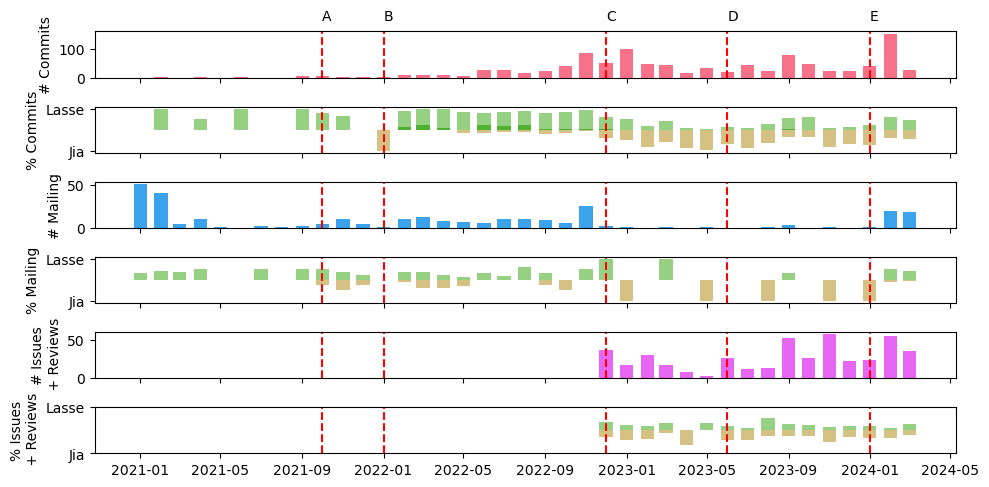

In [30]:
# Without lines of code

P = list(sns.husl_palette(6))
W = 20
fig, axs = plt.subplots(6, figsize=(10, 5), sharex=True)
#sns.despine(fig)

# Plot 0

axs[0].bar(df_all['Date'], df_all['Commits'], color=P[0], width=W)
#axs[0].set_xticks([])
axs[0].set_ylabel('# Commits')

# Plot 1

axs[1].bar(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['C %'], color=P[1], width=W)
axs[1].bar(mdf_jiat['Date'], -1*mdf_jiat['C %'], alpha=0.6, color=P[1], width=W)

axs[1].bar(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['C %'], color=P[2], width=W)
axs[1].bar(mdf_lasse['Date'], mdf_lasse['C %'], alpha=0.6, color=P[2],width=W)
#axs[1].set_xticks([])
axs[1].set_yticks([1,-1],['Lasse', 'Jia'])
axs[1].set_ylabel('% Commits')


# plot 2
axs[2].bar(df_mailing['Date'], df_mailing['all'], width=W, color=P[4])
axs[2].set_ylabel('# Mailing')

# plot 3
axs[3].bar(df_mailing['Date'], df_mailing['main%'], width=W, color=P[2], alpha=0.6)
axs[3].bar(df_mailing['Date'], -1 * df_mailing['attacker%'], width=W, color=P[1], alpha=0.6)
axs[3].set_yticks([1,-1],['Lasse', 'Jia'])

axs[3].set_ylabel('% Mailing')


# plot 4
axs[4].bar(df_interactions['Date'], df_interactions['all'], width=W, color=P[5])
axs[4].set_ylabel('# Issues\n + Reviews')

# plot 5
axs[5].bar(df_interactions['Date'], df_interactions['main%'], width=W, color=P[2], alpha=0.6)
axs[5].bar(df_interactions['Date'], -1 * df_interactions['attacker%'], width=W, color=P[1],alpha=0.6)
axs[5].set_yticks([1,-1],['Lasse', 'Jia'])

axs[5].set_ylabel('% Issues\n + Reviews')




for ax in axs:
    for event in df_events.itertuples():
        ax.axvline(x=event.Date, color='r', linestyle='--')

for i, event in enumerate(df_events.itertuples()):
    axs[0].text(event.Date, 200, chr(ord('A')+i), rotation=0)


plt.tight_layout()

plt.savefig("changes_in_repository_no_lines.pdf")

In [31]:
df_userc = df_mailing.merge(df_interactions, on='Date', how='outer')
df_sf2 = df_sf.add_suffix("_z")
df_sf2 = df_sf2.rename(columns={'Date_z': 'Date'})
df_userc = df_userc.merge(df_sf2, on='Date', how='outer')


In [32]:
df_userc.fillna(0, inplace=True)

In [33]:
df_userc['all'] = df_userc['all_x'] + df_userc['all_y'] + df_userc['all_z'] 
df_userc['main'] = df_userc['main_x'] + df_userc['main_y'] + df_userc['main_z']
df_userc['attacker'] = df_userc['attacker_x'] + df_userc['attacker_y'] + df_userc['attacker_z']

df_userc['main%'] = df_userc['main'] / df_userc['all']
df_userc['attacker%'] = df_userc['attacker'] / df_userc['all']

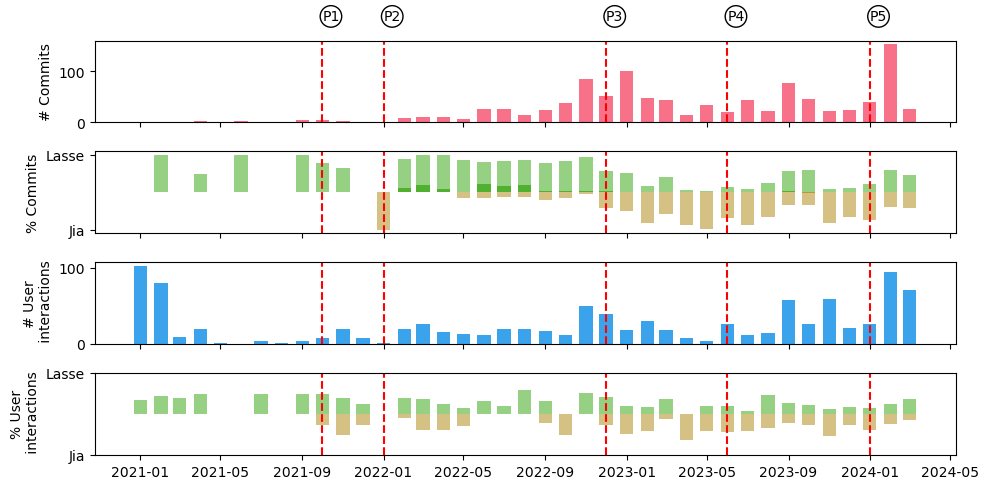

In [34]:
# Without lines of code

P = list(sns.husl_palette(6))
W = 20
fig, axs = plt.subplots(4, figsize=(10, 5), sharex=True)
#sns.despine(fig)

# Plot 0

axs[0].bar(df_all['Date'], df_all['Commits'], color=P[0], width=W)
#axs[0].set_xticks([])
axs[0].set_ylabel('# Commits')

# Plot 1

axs[1].bar(mdf_jiat_thanks_lasse['Date'], -1*mdf_jiat_thanks_lasse['C %'], color=P[1], width=W)
axs[1].bar(mdf_jiat['Date'], -1*mdf_jiat['C %'], alpha=0.6, color=P[1], width=W)

axs[1].bar(mdf_lasse_thanks_jiat['Date'], mdf_lasse_thanks_jiat['C %'], color=P[2], width=W)
axs[1].bar(mdf_lasse['Date'], mdf_lasse['C %'], alpha=0.6, color=P[2],width=W)
#axs[1].set_xticks([])
axs[1].set_yticks([1,-1],['Lasse', 'Jia'])
axs[1].set_ylabel('% Commits')


# plot 2
axs[2].bar(df_userc['Date'], df_userc['all'], width=W, color=P[4])
axs[2].set_ylabel('# User\n interactions')

# plot 3
axs[3].bar(df_userc['Date'], df_userc['main%'], width=W, color=P[2], alpha=0.6)
axs[3].bar(df_userc['Date'], -1 * df_userc['attacker%'], width=W, color=P[1], alpha=0.6)
axs[3].set_yticks([1,-1],['Lasse', 'Jia'])

axs[3].set_ylabel('% User\n interactions')





for ax in axs:
    for event in df_events.itertuples():
        ax.axvline(x=event.Date, color='r', linestyle='--')

for i, event in enumerate(df_events.itertuples()):
    axs[0].text(event.Date, 200, event.Description, rotation=0, bbox = dict(boxstyle=f"circle,pad=0.15", fc="white"))


plt.tight_layout()

plt.savefig("changes_in_repository_no_lines_user_interactions.pdf")